# Titanic: Machine Learning from Disaster

## Imports

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read the data

In [315]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Explore the data

### Get first look of the data

In [316]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [317]:
print(train.columns)
train.sample(10)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


### Missing values

In [318]:
print('percentage of missing values in Age: {0}%'.format(round(train['Age'].isnull().sum()/train.shape[0] * 100, 2)))
print('percentage of missing values in Cabin: {0}%'.format(round(train['Cabin'].isnull().sum()/train.shape[0] * 100, 2)))
print('percentage of missing values in Embarked: {0}%'.format(round(train['Embarked'].isnull().sum()/train.shape[0] * 100, 2)))

percentage of missing values in Age: 19.87%
percentage of missing values in Cabin: 77.1%
percentage of missing values in Embarked: 0.22%


There are many missing values in Age and Cabin columns

### Visualizations

bar_chart will take a feature name as argument and create a barchart with the Survived attribute

In [319]:
def bar_chart(feature):
    sns.barplot(x=feature, y="Survived", data=train)
    plt.show()

male      577
female    314
Name: Sex, dtype: int64


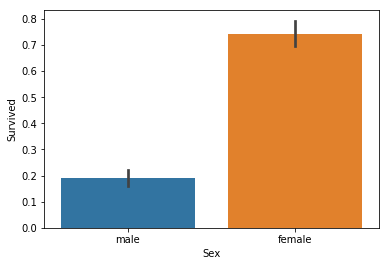

In [320]:
print(train['Sex'].value_counts())
bar_chart('Sex')

There were more men than women on the ship, but a sufficiently larger proportion of women survived. So it is more likely for a woman to survive than a man

3    491
1    216
2    184
Name: Pclass, dtype: int64


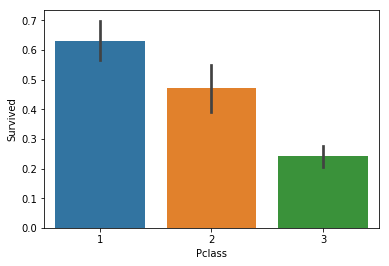

In [321]:
print(train['Pclass'].value_counts())
bar_chart('Pclass')

1st class passengers are more likely to survive than others 

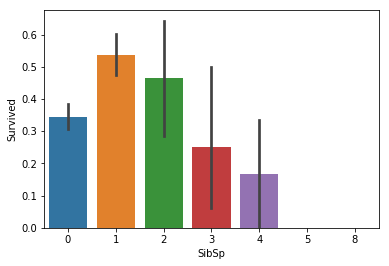

In [322]:
bar_chart('SibSp')

From the graph, it looks like a person with 1 or 2 siblings/spouses are more likely to survive than a person with none or more than 2

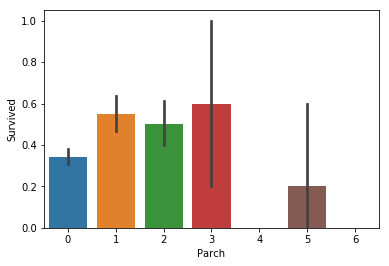

In [323]:
bar_chart('Parch')

It looks like a person having children or parents on board had a higher likelihood of survival compare to people travelling alone. However, a person with 4 or more children or parents aboard most likely died

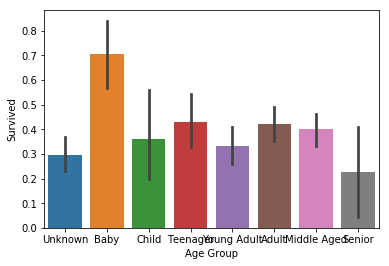

In [324]:
#fill unknown age values with -0.5
train['Age'].fillna(-0.5, inplace=True)
test['Age'].fillna(-0.5, inplace=True)


bins = [-1, 0, 5, 12, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

train['Age Group'] = pd.cut(train['Age'], bins, labels=labels)
test['Age Group'] = pd.cut(test['Age'], bins, labels=labels)

sns.barplot(x='Age Group', y='Survived', data=train)
plt.show()

Babies have the highest chance of survival and seniors have the lowest

In [325]:
train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

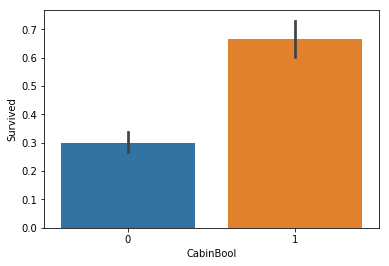

In [326]:
sns.barplot(x='CabinBool', y='Survived', data=train)
plt.show()

People with cabins are most likely of higher socio-econmic class and therefore are more likely to survive. 65% of people with cabins survived compared to about 30% without

## Clean the data

In [327]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Oxenham, Mr. Percy Thomas",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Middle Aged,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,94,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


### Cabin feature

We can drop the cabin feature as no more useful information can be gathered from it

In [328]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

### Embarked feature

In [329]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


In [330]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Fill the 2 null values with the most frequent value

In [331]:
train['Embarked'].fillna(value='S', inplace=True)

### Ticket feature

We can also drop the ticket column as ticket number is unlikely to give any useful information

In [332]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

### Age feature

Since majority of the values are missing, it wouldn't be useful to fill them with the same value. We can find a better mechanism to predict age

In [333]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

A new feature called Title is added by extracting the titles from the names using regex

In [334]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are only a few people with less common names so they can be grouped together as Rare. Some of the other titles can be replaced with more common titles

In [335]:
train['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare', inplace=True)
test['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Dona'], 'Rare', inplace=True)

train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal', inplace=True)
test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal', inplace=True)

train['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)
test['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)

In [336]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,186,0
Mr,0,517
Mrs,125,0
Rare,1,19
Royal,2,1


Find the most common Age Group for each title

In [337]:
master_age_group = train[train['Title'] == 'Master']['Age Group'].value_counts().idxmax()
miss_age_group = train[train['Title'] == 'Miss']['Age Group'].value_counts().idxmax()
mr_age_group = train[train['Title'] == 'Mr']['Age Group'].value_counts().idxmax()
mrs_age_group = train[train['Title'] == 'Mrs']['Age Group'].value_counts().idxmax()
rare_age_group = train[train['Title'] == 'Rare']['Age Group'].value_counts().idxmax()
royal_age_group = train[train['Title'] == 'Royal']['Age Group'].value_counts().idxmax()

Impute unknown age groups with the most common age group for each title

In [338]:
def impute_age_group(record):
    if record['Age Group'] == 'Unknown':
        if record['Title'] == 'Master':
            return master_age_group
        elif record['Title'] == 'Miss':
            return miss_age_group
        elif record['Title'] == 'Mr':
            return mr_age_group
        elif record['Title'] == 'Mrs':
            return mrs_age_group
        elif record['Title'] == 'Rare':
            return  rare_age_group
        else:
            return  royal_age_group
    else:
        return record['Age Group']

train['Age Group'] = train.apply(impute_age_group, axis=1)
test['Age Group'] = train.apply(impute_age_group, axis=1)

There is a missing Fare feature in the test set, so we impute it using the mean fare value for that pclass

In [339]:
pclass = test['Pclass'][test['Fare'].isna()]
fares = test['Fare'][test['Pclass'] == pclass.iloc[0]]

In [340]:
test['Fare'].fillna(fares.mean(), inplace=True)
test['Fare'].isna().sum()

0

Assign the Fare feature into categorical fare ranges

In [341]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

We can drop the Name, Age, Fare, and Title features since they are not required anymore

In [342]:
train.drop(['Name', 'Age', 'Fare', 'Title'], axis=1, inplace=True)
test.drop(['Name', 'Age', 'Fare', 'Title'], axis=1, inplace=True)

In [343]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,CabinBool,FareBand
110,111,0,1,male,0,0,S,Middle Aged,1,4
537,538,1,1,female,0,0,C,Adult,0,4
83,84,0,1,male,0,0,S,Adult,0,4
358,359,1,3,female,0,0,Q,Young Adult,0,1
468,469,0,3,male,0,0,Q,Adult,0,1
346,347,1,2,female,0,0,S,Middle Aged,0,2
303,304,1,2,female,0,0,Q,Young Adult,1,2
331,332,0,1,male,0,0,S,Middle Aged,1,3
62,63,0,1,male,1,0,S,Middle Aged,1,4
751,752,1,3,male,0,1,S,Child,1,2


We will change the nominal variables to discrete

In [344]:
#Sex
sex_mapping = {'female': 0, 'male': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

#Embarked
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

#Age Group
age_group_mapping = {'Adult': 0, 'Middle Aged': 1, 'Young Adult': 2, 'Teenager': 3, 'Baby': 4, 'Child': 5, 'Senior': 6}
train['Age Group'] = train['Age Group'].map(age_group_mapping)
test['Age Group'] = test['Age Group'].map(age_group_mapping)

In [345]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,CabinBool,FareBand
119,120,0,3,0,4,2,0,4,0,4
663,664,0,3,1,0,0,0,1,0,1
708,709,1,1,0,0,0,0,2,0,4
142,143,1,3,0,1,0,0,2,0,3
686,687,0,3,1,4,1,0,3,0,4
11,12,1,1,0,0,0,0,1,1,3
693,694,0,3,1,0,0,1,2,0,1
543,544,1,2,1,1,0,0,0,0,3
31,32,1,1,0,1,0,1,1,1,4
455,456,1,3,1,0,0,1,0,0,1


## Model Selection

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['PassengerId', 'Survived'], axis=1)
target = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

### Decision Tree

In [347]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Decision Tree Accuracy:', acc_dt)

Decision Tree Accuracy: 79.1


### Random Forest

In [348]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
acc_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Random Forest Accuracy:', acc_rf)

Random Forest Accuracy: 78.36


### KNN

In [349]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print('KNN Accuracy:', acc_knn)

KNN Accuracy: 79.48


## Predictions

In [350]:
x_train = train.drop(['PassengerId', 'Survived'], axis=1)
y_train = train['Survived']


model = RandomForestClassifier()
model.fit(x_train, y_train)


#set ids as PassengerId and predict survival 
ids = test['PassengerId']
x_test = test.drop(['PassengerId'], axis=1)
y_pred = model.predict(x_test)

In [351]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': y_pred })
output.to_csv('output/submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'output/submission.csv'